## Developing Teleportation Protocol 

Some Important Concepts (Most of which are discussed before)



1.   Classical CNOT gate can copy bits but not a qubit. Let's say we take a bit in some unknown state $x$, and another scratchpad bit initialized to $0$, The output will be $x\oplus 0 (=x)$ and $x$.  
2. XOR gate is irreversible i.e. given the output we cannot determine what were the inputs. 
3. CNOT gate in quantum computing is reversible just like any other quantum gates as the operations are unitary. 
4. CNOT gate cannot copy arbitrary qubit. Consider $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ and another scratchpad bit initialised to $|0\rangle$, so the inital state is bafore feeding it to CNOT gate is $|\psi \rangle \otimes |0\rangle = \alpha |00\rangle + \beta |10\rangle$. After CNOT this state becomes $|\psi^*\rangle = \alpha |00\rangle + \beta |11\rangle$. However for exact copy we need to have two $|\psi\rangle$s. Which is $|\psi\rangle \otimes |\psi\rangle = \alpha ^2 |00\rangle + \alpha \beta |01\rangle + \alpha \beta |10\rangle + \beta ^2 |11\rangle$.    So until and unless $\alpha \beta = 0$, this circuit cannot 'copy' an arbitary quantum state. (Part of No Cloning Theorem which states that qubits cannot be copied). That's why instead of copy we teleport the arbitrary qubit between two observers. But how to do this ? 

Let's develop the protocol below.

### Step 1: Sharing Entangled Pair

Our two observers Alice and Bob who were dating but now they have broken up and live far apart.  While they were together they generated an EPR pair (Bell state) and each took one qubit of the EPR pair as a memory when they separated. After all these years, Alice finally decided to start the patch up process and send some signal to Bob. Problem is she has decided to deliver a qubit $|\psi\rangle$, the state of which she doesn't know.   

First consider the entangled pair they created --

$|\beta _{00}\rangle = \frac{|0_A\rangle |0_B\rangle + |1_A\rangle |1_B\rangle}{\sqrt{2}}....(1)$. 

The first member of the pair belongs to Alice and the other belongs to Bob. 

Alice wants to send the state $|\chi\rangle = \alpha |0\rangle + \beta|1 \rangle$ to Bob. At this pointit is good to appreciate that even if Alice would have known the state $|\chi\rangle$, describing it precisely would have taken infinite amount of classical information as $|\chi\rangle$ takes value in a continuous space (because of $\alpha$ and $\beta$).      

### Step 2: Alice Applies CNOT Followed by Hadamard Gate.

First Let write out the input state explicitly --

$|\psi\rangle = |\chi \rangle \otimes |\beta _{00}\rangle = \left(\alpha |0\rangle + \beta|1 \rangle \right) \otimes  \left(\frac{|00\rangle + |11\rangle}{\sqrt{2}}\right) ....(2)$. 

After the tensor product it looks as below-- 

$|\psi\rangle = \frac{\alpha \left(|000\rangle + |011\rangle \right) + \beta \left(100\rangle + |111\rangle \right)}{\sqrt{2}} ....(3)$. 

By comparing with eq.(1) we know that first 2 qubits (first coming from the qubit she wants to send and the second is the EPR member) belongs to Alice and third qubit to Bob. Here Alice uses the unknown state $|\chi\rangle$ as the control bit and the EPR member as the target bit. So after application of CNOT gate --

$|\psi^*\rangle = U_{CNOT} |\psi\rangle = \frac{\alpha \left(|000\rangle + |011\rangle \right) + \beta \left(110\rangle + |101\rangle \right)}{\sqrt{2}}.... (4)$. 

This can also be written as -- 

$|\psi^*\rangle = \frac{\alpha |0\rangle\left(|00\rangle + |11\rangle \right) + \beta |1\rangle\left(10\rangle + |01\rangle \right)}{\sqrt{2}}.... (5)$.

After this Alice applies the Hadamard gate to the first qubit-- 

$|\psi^{**}\rangle = H|\psi ^*\rangle = \alpha \left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right)\, \left(\frac{|00\rangle + |11\rangle}{\sqrt{2}}\right)\, + \beta \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)\, \left(\frac{|10\rangle + |01\rangle}{\sqrt{2}}\right).... (6)$. 


*Important: This operation --- CNOT followed by H gate is exactly reverse of what we do to create Bell pair, i.e. first we apply a Hadamard Gate to create superpostion followed by a CNOT Gate*.

### Step 3: Alice Measures the Qubits in Her Possession. 

Alice measures the 2 qubits in her possession obtaining one of the 4 possible classical results $|00\rangle, |01\rangle, |10\rangle, |11\rangle$. So first let's rearrange the expression in eq. (6). 

$|\psi ^{**}\rangle = \frac{1}{2} \left(|00\rangle \left(\alpha |0\rangle + \beta |1\rangle \right) + |01\rangle \left(\alpha |1\rangle + \beta |0\rangle \right) + |10\rangle \left(\alpha |0\rangle -\beta|1\rangle\right) + |11\rangle \left(\alpha |1\rangle - \beta |0\rangle\right) \right)...(7)$. 

If Alice measures $|00\rangle$ then the state collapses and Bob will have $\alpha |0\rangle + \beta |1\rangle$ and so on... Depending on Alice's measurement Bob's qubit will end up in the 4 states and what Alice measured that information should be communicated to Bob. 

### Step 4: Alice Communicates Her Measurement 

Quantum teleportation does not enable faster than light communication,
because to complete the teleportation Alice must transmit her measurement result to Bob over a classical communications channel-- a telephone, email message, radio wave, or something— some mechanism governed by the speed of light limit. Let's see based on Alice's observation what Bob needs to do to obtain the state Alice wanted to send him-- 

|Alice Measured      |Bob's Qbit                             | Transformation|
|:--------------      |:------------------------:            |:-----:         |
|   00               | $\alpha |0\rangle + \beta |1\rangle $ |     None      |
|--------------------|---------------------------------------|---------------|
|   01               | $\alpha |1\rangle + \beta |0\rangle$  |     X-Gate    |
|--------------------|---------------------------------------|---------------|
|   10               | $\alpha |0\rangle -\beta|1\rangle$    |     Z-Gate    |
|--------------------|---------------------------------------|---------------| 
|   11               | $\alpha |1\rangle - \beta |0\rangle$  |     ZX-Gate   |

We can also generalize the transformation operation that Bob needs to perform on his qubit to recover the qubit Alice teleported as : $Z^aX^b$ where $a, b$ can take values 0 and 1. 

### Building the Teleportation Circuit (Important Points and Steps)

* First we see that 3 qubits are involved, 2 of which belongs to Alice and another belongs to Bob. 

* Alice gets the measurement result in classical bits 00, 01, 10, 11, i.e. we need classical registers that will be used to store the measured result. 

* First we need to create bell pair (H and CNOT)
* Perform what Alice did (CNOT then H)
* Measure
* Perform What bob did depending upon Alice's result. 

In [2]:
# !pip3 install qiskit

In [4]:
# !pip3 install pylatexenc

In [5]:
import qiskit as q

import numpy as np

import matplotlib.pyplot as plt

In [6]:
qr = q.QuantumRegister(3, name="q")
crz, crx = q.ClassicalRegister(1, name="crz"), q.ClassicalRegister(1, name="crx")
teleport_circuit = q.QuantumCircuit(qr, crz, crx)
teleport_circuit.draw()

q_0: 
       
  q_1: 
       
  q_2: 
       
crz: 1/
       
crx: 1/

In [7]:
def epr_pair(qc, a, b):
  '''
  qc is the quantum circuit
  a, b are two different qubits
  '''
  qc.h(a)
  qc.cx(a, b)

In [8]:
epr_pair(teleport_circuit, qr[1], qr[2]) # we leave 0th qubit (this will be used later as Alice's qubit the she wants to teleport)
teleport_circuit.draw()

q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

In [9]:
# assume alice owns q_1 and bob owns q_2
# now we are ready to take the transformations that Alice applies
# the qubit she wants to teleport is control bit and the epr member bit is the target bit 

def alice_steps(qc, psi, a):
  qc.cx(psi, a)
  qc.h(psi)

In [10]:
teleport_circuit.barrier() # barrier ensures the epr pair creation part isn't hampered/optimized by whatever happens next

alice_steps(teleport_circuit, qr[0], qr[1])
teleport_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

In [11]:
# after this alice applies the measurement 
def alice_measure(qc, a, b):
  qc.barrier()
  qc.measure(a, 0) # measures the first qubit and put it into first classical register 
  # measure goes as 
  # Measure quantum bit into classical bit (tuples).

  # Args:
  #     qubit (QuantumRegister|list|tuple): quantum register
  #     cbit (ClassicalRegister|list|tuple): classical register
  qc.measure(b, 1)  




In [12]:
alice_measure(teleport_circuit, 0, 1) # 0th qubit is the one she wants to send and 1st qubit is one of the EPR pairs
teleport_circuit.draw() 

░      ┌───┐ ░ ┌─┐   
  q_0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
  q_2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
                                     ║ 
crx: 1/══════════════════════════════╩═
                                     0

In [13]:
def bob_transform(qc, bob_bit, crz, crx):
  qc.x(bob_bit).c_if(crx, 1) #c_if Add classical condition on register classical and value val c_if(self, classical, val) 
  qc.z(bob_bit).c_if(crz, 1) # apply x and z gate only when if any of then are in the state '1'

In [14]:
teleport_circuit.barrier()
bob_transform(teleport_circuit, qr[2], crz, crx)
teleport_circuit.draw()

░      ┌───┐ ░ ┌─┐    ░               
  q_0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════╩══╬═══════╬═══╡ = 1 ╞
                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════╩════╡ = 1 ╞═══════
                                     0    └─────┘

In [15]:
from qiskit.quantum_info import random_statevector
psi = random_statevector(2, seed=10)
print ('check the qubit Alice wants to teleport: ', psi, type(psi),  type(psi.data))

check the qubit Alice wants to teleport:  Statevector([0.07893689-0.14696924j, 0.58314028+0.79505749j],
            dims=(2,)) <class 'qiskit.quantum_info.states.statevector.Statevector'> <class 'numpy.ndarray'>


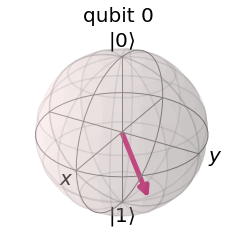

In [16]:
q.visualization.plot_bloch_multivector(psi)

In [17]:
from qiskit.extensions import Initialize
init_qubit = Initialize(psi.data)
init_qubit.label = "init"

In [18]:
inverse_init_qubit = init_qubit.gates_to_uncompute() 
#initialization start from zero to psi, we reverse this initialization so it takes us back to zero 

In [19]:
qc_new_teleport = q.QuantumCircuit(qr, crz, crx)
qc_new_teleport.append(init_qubit, [qr[0]])
qc_new_teleport.barrier()
epr_pair(qc_new_teleport, qr[1], qr[2])
qc_new_teleport.barrier()
alice_steps(qc_new_teleport, qr[0], qr[1])
alice_measure(qc_new_teleport, qr[0], qr[1])
bob_transform(qc_new_teleport, qr[2], crz, crx)
qc_new_teleport.draw()

┌──────┐ ░            ░      ┌───┐ ░ ┌─┐                 
  q_0: ┤ init ├─░────────────░───■──┤ H ├─░─┤M├─────────────────
       └──────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              
  q_1: ─────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────
                ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
  q_2: ─────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─
                ░      └───┘ ░            ░  ║  ║  └─╥─┘  └─╥─┘ 
                                             ║  ║    ║   ┌──╨──┐
crz: 1/══════════════════════════════════════╩══╬════╬═══╡ = 1 ╞
                                             0  ║ ┌──╨──┐└─────┘
crx: 1/═════════════════════════════════════════╩═╡ = 1 ╞═══════
                                                0 └─────┘

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
path = '/content/drive/My Drive/'

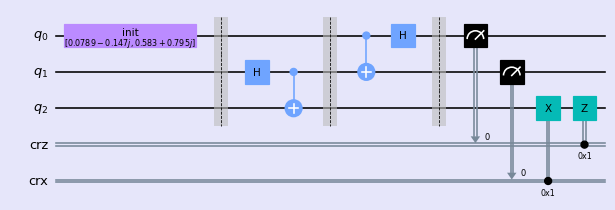

In [27]:
style = {'backgroundcolor': 'lavender', 'dpi':200, 'subfontsize':10}

qc_new_teleport.draw(output='mpl',scale=0.8, style=style, filename=path+'teleport_1.png')

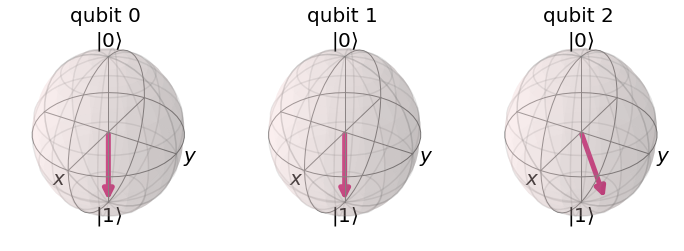

In [29]:
statevec_sim = q.Aer.get_backend('statevector_simulator')
qobj = q.assemble(qc_new_teleport)

out_vector = statevec_sim.run(qobj).result().get_statevector()
q.visualization.plot_bloch_multivector(out_vector,)

### How to Verify Teleportation 
What we expect is the bit that Alice wants to teleport $\left(\text{state}\, |\psi\rangle \,,  q_0\, \right)$ should be with Bob after the operation $(q_2)$. But we can't measure that state (with exact value of the coefficients $\alpha, \beta$ in $\alpha |0\rangle + \beta |1\rangle$) to see if it is indeed the qubit state Alice wanted to teleport beause measuring the qubit will result that it to collapse either in $|0\rangle$ or $|1\rangle$. But if we do an inverse of the initialization process in qubit $q_2$ after the teleportation is done we expect to get back $|0\rangle$. Because the initialization process that was used to create random qubit (which Alice would like to teleport) first performs a reset, setting the qubit to the state $|0\rangle$ and it then applies gates to turn $|0\rangle$ to $|\psi\rangle$.  So let's check-- 

In [ ]:
qc_teleport_check = q.QuantumCircuit(qr, crz, crx)
qc_teleport_check.append(init_qubit, [qr[0]])
qc_teleport_check.barrier()
epr_pair(qc_teleport_check, qr[1], qr[2])
qc_teleport_check.barrier()
alice_steps(qc_teleport_check, qr[0], qr[1])
alice_measure(qc_teleport_check, qr[0], qr[1])
bob_transform(qc_teleport_check, qr[2], crz, crx)
qc_teleport_check.append(inverse_init_qubit, [qr[2]])

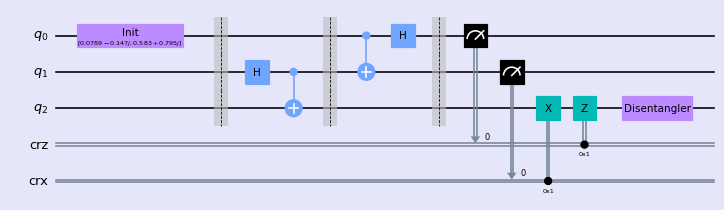

In [ ]:
style = {'backgroundcolor': 'lavender'}

qc_teleport_check.draw(output='mpl',scale=0.8, style=style)

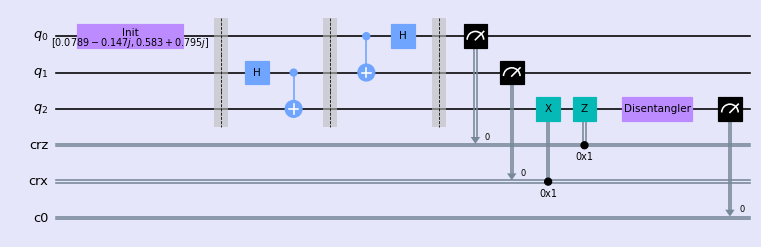

In [ ]:
cr_result = q.ClassicalRegister(1) # we need another register to measure if we get 0 or not 
qc_teleport_check.add_register(cr_result)
qc_teleport_check.measure(qr[2], 2) # measure the last qubit and put it into the last classical register
qc_teleport_check.draw(output='mpl', scale=0.8, style={'backgroundcolor': 'lavender', 'subfontsize':12})

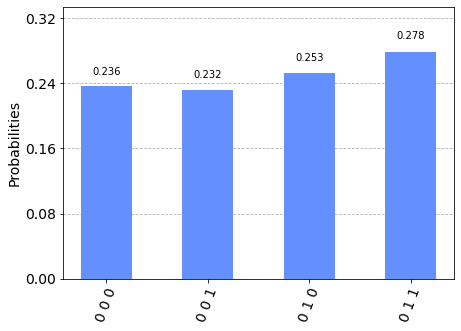

In [ ]:
simulator = q.Aer.get_backend(name='qasm_simulator')
results = q.execute(qc_teleport_check, backend=simulator,).result()
q.visualization.plot_histogram(results.get_counts(qc_teleport_check)) 

All output cases have left-most qubit $|q_2\rangle$ at 0 which is exactly what we have expected. Bingo !  